# Case study on Supervised learning

# Do the following in the iris dataset.
# 1. Read the dataset to the python environment.
# 2. Do necessary pre-processing steps.
# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)
 

#####################################################################################################################

# 1. Read the dataset to the python environment.

In [114]:
#import all the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load the latest xls sheet to a variable named spreadsheet
iris_spreadsheet = pd.ExcelFile(r"iris_Jan.xls")
#Move the first sheet (with index value 0) to iris_data
iris_data = spreadsheet.parse(0)

In [115]:
# Check the head of iris_data
iris_data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [116]:
# Check the basic details of the Iris dataset
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


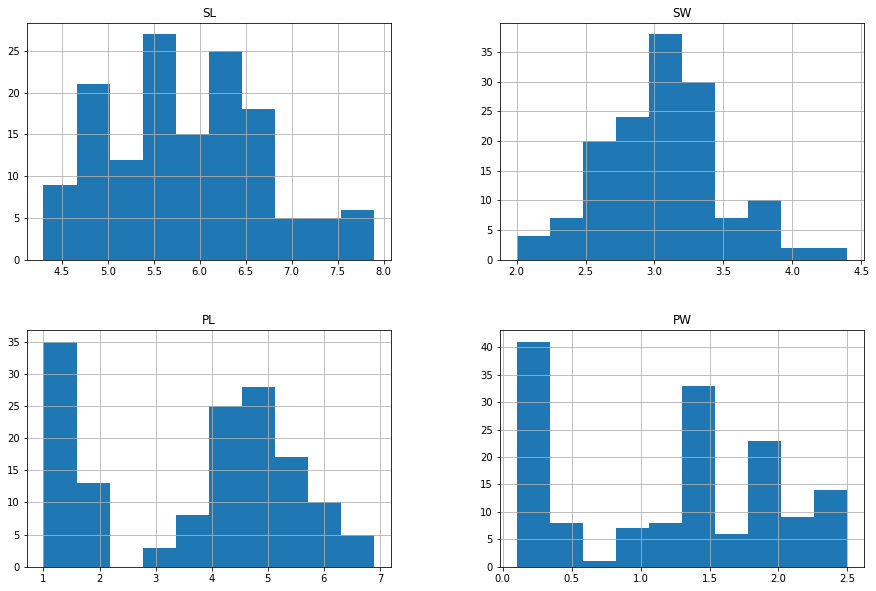

In [8]:
#Check the visualizations for float datatype columns
freqgraph = iris_data.select_dtypes(include=['float64'])
freqgraph.hist(figsize=(15,10))
plt.show()

# 2. Do necessary pre-processing steps.

# 2.1 - Filling missing values for 'SL' 

In [9]:
# Use describe to check the stats for 'SL'
iris_data['SL'].describe()

count    143.000000
mean       5.855944
std        0.828168
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: SL, dtype: float64

In [19]:
# Find the median for 'SL' in order to check if it matches 50 percentile as shown in the describe function
Median_SL = np.nanmedian(iris_data['SL'])

In [20]:
Median_SL

5.8

In [117]:
# We could seethat 'SL' has a near to normal distribution where mean and median are almost equal.
# So we can replace the missing values of 'SL' with median
iris_data['SL']=iris_data['SL'].fillna(iris_data['SL'].median())

C:\Users\MY BOOK\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SL', ylabel='Density'>

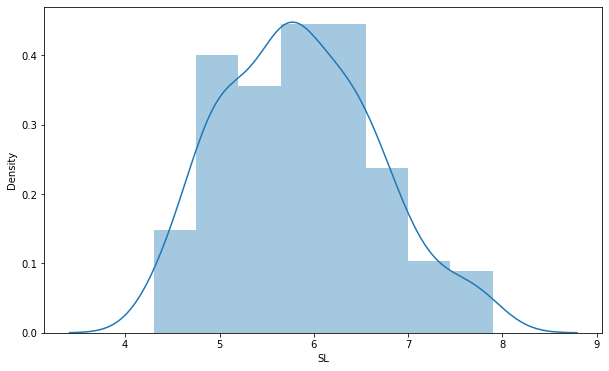

In [118]:
# Plot for "SL" after filling the missing values with 'median'
fig , ax = plt.subplots(figsize=(10,6))
sns.distplot(iris_data['SL'])

In [23]:
# Check the dataset and see whether 'SL' has any missing values 
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# 2.2 - Filling missing values for 'SW' 

In [119]:
# Check the stats for 'SW'
iris_data['SW'].describe()

count    144.000000
mean       3.049306
std        0.430644
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: SW, dtype: float64

In [25]:
# Check if 50 percentile data is the same as median for 'SW'
Median_SW = np.nanmedian(iris_data['SW'])

In [26]:
Median_SW

3.0

In [120]:
# We could seethat 'SW' has a near to normal distribution where mean and median are almost equal.
# So we can replace the missing values of 'SW' with median
iris_data['SW']=iris_data['SW'].fillna(iris_data['SW'].median())

C:\Users\MY BOOK\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SW', ylabel='Density'>

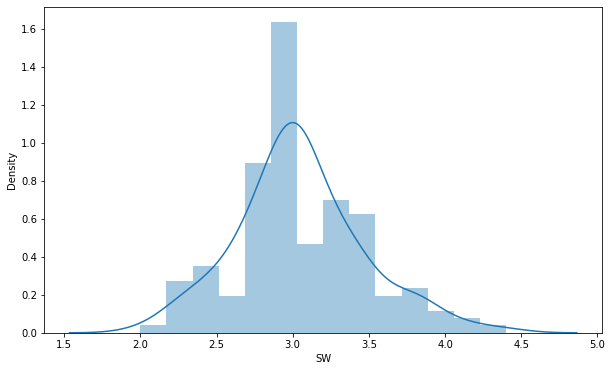

In [121]:
# Plot for "SW" after filling the missing values with 'median'
fig , ax = plt.subplots(figsize=(10,6))
sns.distplot(iris_data['SW'])

In [122]:
# Check the iris dataset and see if 'SW' has anymore missing data
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# 2.3 - Filling missing values for 'PL' 

In [123]:
iris_data['PL'].describe()

count    144.000000
mean       3.756250
std        1.761306
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: PL, dtype: float64

In [31]:
# Check if median of 'PL' is the same as 50 percentile as shown in describe
Median_PL = np.nanmedian(iris_data['PL'])

In [32]:
Median_PL

4.35

# The median seems to be varying a bit from the mean for 'PL'. So let's visualize 'PL' distribution to find the strategy for filling missing values 

C:\Users\MY BOOK\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PL', ylabel='Density'>

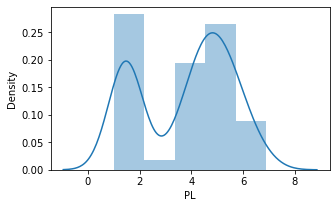

In [125]:

# Plot for "PL" after filling the missing values with 'median'
fig , ax = plt.subplots(figsize=(5,3))
sns.distplot(iris_data['PL'])

In [126]:
# We could seethat 'PL' has a near to normal distribution where the midpoint has a wavy trend .
# So we can replace the missing values of 'PL' with median as mean would have been affected by extreme values
iris_data['PL']=iris_data['PL'].fillna(iris_data['PL'].median())

C:\Users\MY BOOK\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PL', ylabel='Density'>

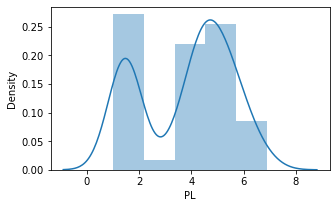

In [128]:
# Plot for "PL" after filling the missing values with 'median'
fig , ax = plt.subplots(figsize=(5,3))
sns.distplot(iris_data['PL'])

In [129]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Finding outlliers for 'SL'

In [131]:
# Calculate quartile values for 'SL' using 25 , 50 and 75 percentilevalues
Q1_SL = np.percentile(iris_data['SL'],25,interpolation='midpoint')
Q2_SL = np.percentile(iris_data['SL'],50,interpolation='midpoint')
Q3_SL = np.percentile(iris_data['SL'],75,interpolation='midpoint')

# Calculate Interquartile Range, Low limit and higher limit for 'SL'
IQR_SL = Q3_SL - Q1_SL
Low_Lim_SL = Q1_SL - 1.5*IQR_SL
High_Lim_SL = Q3_SL + 1.5*IQR_SL

# Find all outlier values SL 
outlier_SL_using_quartile = []
for x in iris_data['SL']:
    if ( x < Low_Lim_SL ) or ( x > High_Lim_SL ):
        outlier_SL_using_quartile.append(x)
    

In [88]:
outlier_SL_using_quartile

[]

# There are no outlier values for 'SL' and therefore no data needs to be dropped because of extreme values of 'SL' 

# Finding outlliers for 'PW'

In [132]:
# Calculate quartile values for 'PW' using 25 , 50 and 75 percentile values
Q1_PW = np.percentile(iris_data['PW'],25,interpolation='midpoint')
Q2_PW = np.percentile(iris_data['PW'],50,interpolation='midpoint')
Q3_PW = np.percentile(iris_data['PW'],75,interpolation='midpoint')

# Calculate IQR, Low limit and high limit values for 'PW'
IQR_PW = Q3_PW - Q1_PW
Low_Lim_PW = Q1_PW - 1.5*IQR_PW
High_Lim_PW = Q3_PW + 1.5*IQR_PW

# Find all outlier values for 'PW'
outlier_PW_using_quartile = []
for x in iris_data['PW']:
    if ( x < Low_Lim_PW ) or ( x > High_Lim_PW ):
        outlier_PW_using_quartile.append(x)
    

In [133]:
outlier_PW_using_quartile

[]

# There are no outlier values for 'PW' and therefore no data needs to be dropped because of extreme values of 'PW' 

# Finding outlliers for 'SW'

In [134]:
# Calculate quartile values for 'SW' using 25 , 50 and 75 percentile values
Q1_SW = np.percentile(iris_data['SW'],25,interpolation='midpoint')
Q2_SW = np.percentile(iris_data['SW'],50,interpolation='midpoint')
Q3_SW = np.percentile(iris_data['SW'],75,interpolation='midpoint')

# Find IQR, Low limit and higher limit values for 'SW'
IQR_SW = Q3_SW - Q1_SW
Low_Lim_SW = Q1_SW - 1.5*IQR_SW
High_Lim_SW = Q3_SW + 1.5*IQR_SW

# Find all outlier values for 'SW' 
outlier_SW_using_quartile = []
for x in iris_data['SW']:
    if ( x < Low_Lim_SW ) or ( x > High_Lim_SW ):
        outlier_SW_using_quartile.append(x)
    

In [135]:
outlier_SW_using_quartile

[4.0, 4.4, 4.1, 4.2, 2.0]

# The values 4.0, 4.4 , 4.1 , 4.2 and 2.0 seems to be outliers for 'SW' and needs to be dropped

In [136]:
# Let's find out which are the higher outlier SW indexes
indi_outlier_SW = []
indi_outlier_SW = iris_data['SW'] > High_Lim_SW
iris_data.loc[indi_outlier_SW].index



Int64Index([14, 15, 32, 33], dtype='int64')

In [137]:
# Let's find out which are the lower outlier SW indexes
indi_outlier_SW = iris_data['SW'] < Low_Lim_SW
iris_data.loc[indi_outlier_SW].index

Int64Index([60], dtype='int64')

In [138]:
# Let's drop the indexes having outlier values for 'SW' 
iris_data.drop([ 14, 15, 32, 33, 60],inplace=True)

# Finding outlliers for 'PL'

In [139]:
# Calculate quartile values for 'PL' using 25 , 50 and 75 percentilevalues
Q1_PL = np.percentile(iris_data['PL'],25,interpolation='midpoint')
Q2_PL = np.percentile(iris_data['PL'],50,interpolation='midpoint')
Q3_PL = np.percentile(iris_data['PL'],75,interpolation='midpoint')

# Finding IQL, low and high limit values for 'PL'
IQR_PL = Q3_PL - Q1_PL
Low_Lim_PL = Q1_PL - 1.5*IQR_PL
High_Lim_PL = Q3_PL + 1.5*IQR_PL

# Find all outlier values PL
outlier_PL_using_quartile = []
for x in iris_data['PL']:
    if ( x < Low_Lim_PL ) or ( x > High_Lim_PL ):
        outlier_PL_using_quartile.append(x)
    

In [140]:
outlier_PL_using_quartile

[]

# There are no outlier values for PL and no values needs to be dropped  

In [141]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              145 non-null    float64
 1   SW              145 non-null    float64
 2   PL              145 non-null    float64
 3   PW              145 non-null    float64
 4   Classification  145 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

<AxesSubplot:ylabel='Classification'>

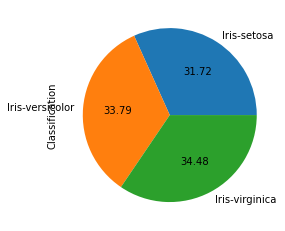

In [142]:
# Let's check the probable distribution of Iris classifications using a pie chart
iris_data.groupby('Classification').size().plot(kind='pie', autopct='%.2f',ylabel="Classification")

# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [154]:
# Do the imports of necessary functions
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
# Seperate the data into dependent and independent variables
X = iris_data.drop('Classification',axis=1)
y = iris_data['Classification']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Predicting the species ("Classification") using Logistic Regression

In [155]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred_log_reg = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred_log_reg))
print(confusion_matrix(y_test, y_pred_log_reg))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy for Logistic regression For finding Iris species is - ',accuracy_score(y_pred_log_reg,y_test))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.93      0.96        14
Iris-versicolor       0.73      0.89      0.80         9
 Iris-virginica       0.92      0.86      0.89        14

       accuracy                           0.89        37
      macro avg       0.88      0.89      0.88        37
   weighted avg       0.90      0.89      0.90        37

[[13  1  0]
 [ 0  8  1]
 [ 0  2 12]]
accuracy for Logistic regression For finding Iris species is -  0.8918918918918919


C:\Users\MY BOOK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Predicting the species ("Classification") using K-Nearest Neighbours

In [156]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train, y_train)

y_pred_KNN = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred_KNN))
print(confusion_matrix(y_test, y_pred_KNN))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy for KNN model in predicting the Iris species is : - ',accuracy_score(y_pred_KNN,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.93      0.96        14
Iris-versicolor       0.67      0.89      0.76         9
 Iris-virginica       0.92      0.79      0.85        14

       accuracy                           0.86        37
      macro avg       0.86      0.87      0.86        37
   weighted avg       0.89      0.86      0.87        37

[[13  1  0]
 [ 0  8  1]
 [ 0  3 11]]
accuracy for KNN model in predicting the Iris species is : -  0.8648648648648649


# Predicting the species ("Classification") using Support Vector Machine

In [157]:
# Support Vector Machine's 
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

y_pred_SVM = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred_SVM))
print(confusion_matrix(y_test, y_pred_SVM))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy for SVM Model in predicting the Iris species is ',accuracy_score(y_pred_SVM,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.93      0.96        14
Iris-versicolor       0.67      0.89      0.76         9
 Iris-virginica       0.92      0.79      0.85        14

       accuracy                           0.86        37
      macro avg       0.86      0.87      0.86        37
   weighted avg       0.89      0.86      0.87        37

[[13  1  0]
 [ 0  8  1]
 [ 0  3 11]]
accuracy for SVM Model in predicting the Iris species is  0.8648648648648649


# Predicting the species ("Classification") using Decision tree

In [158]:
# Decision Tree's
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

classifier.fit(X_train, y_train)

y_pred_DT = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred_DT))
print(confusion_matrix(y_test, y_pred_DT))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy for Decision tree model in predicting the Iris speciesis : -  ',accuracy_score(y_pred_DT,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.80      0.89      0.84         9
 Iris-virginica       0.92      0.86      0.89        14

       accuracy                           0.92        37
      macro avg       0.91      0.92      0.91        37
   weighted avg       0.92      0.92      0.92        37

[[14  0  0]
 [ 0  8  1]
 [ 0  2 12]]
accuracy for Decision tree model in predicting the Iris speciesis : -   0.918918918918919


# Predicting the species ("Classification") using Random Forest algorithm

In [152]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [159]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_RF = classifier.predict(X_test)
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred_RF))
print(confusion_matrix(y_test, y_pred_RF))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy for Random Forest model in predicting the Iris species is : -  ',accuracy_score(y_pred_RF,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.89      0.89      0.89         9
 Iris-virginica       0.93      0.93      0.93        14

       accuracy                           0.95        37
      macro avg       0.94      0.94      0.94        37
   weighted avg       0.95      0.95      0.95        37

[[14  0  0]
 [ 0  8  1]
 [ 0  1 13]]
accuracy for Random Forest model in predicting the Iris species is : -   0.9459459459459459


# We tried the Linear regression, KNN , SVM , decision tree and Random forest algorithms .

# Out of all, the random forest came out with the best accuracy of prediction (0.945) followed by decsion tree model (0.913 )

# Submitted by Viswaraj Chandran